In [125]:
import pandas as pd

ramp_transitions = pd.read_csv('../external_data/ramp_transition_filters.csv')
ramp_transitions['width'] = ramp_transitions.age_group_end - ramp_transitions.age_group_start
ramp_transitions['height'] = (ramp_transitions.systolic_blood_pressure_end 
                              - ramp_transitions.systolic_blood_pressure_start)
ramp_transitions.head()

,guideline,from_ramp,to_ramp,sex,age_group_start,age_group_end,systolic_blood_pressure_start,systolic_blood_pressure_end,cvd_risk_cat,width,height
0,china,mono_starter,mono_starter,Male,0,80,140,300,0,80,160
1,china,mono_starter,mono_starter,Female,0,80,140,300,0,80,160
2,china,mono_starter,elderly,Male,80,125,150,300,0,45,150
3,china,mono_starter,elderly,Female,80,125,150,300,0,45,150
4,china,mono_starter,NaN,Male,0,80,60,140,0,80,80


In [126]:
import itertools

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

def draw_rectangles(ax, state_filters, facecolor='r', edgecolor='b', alpha=0.4):
    filters = []
    for r in state_filters.iterrows():
        xy = (r[1].age_group_start, r[1].systolic_blood_pressure_start)
        rect = Rectangle(xy, r[1].width, r[1].height)
        filters.append(rect)
    
    pc = PatchCollection(filters, facecolor=facecolor, alpha=alpha, edgecolor=edgecolor)
    
    ax.add_collection(pc)
    
def plot_guideline_ramp(data, figure_name):
    i = 1

    fig = plt.figure()

    for sex, cvd_risk_cat in itertools.product(('Male', 'Female'), (0, 1)):
        ax = fig.add_subplot(2, 2, i)
        draw_rectangles(ax, data[(data.sex==sex) & (data.cvd_risk_cat == cvd_risk_cat)])
        ax.set_ylim(0, 360)
        ax.set_xlim(-10, 135)

        container = Rectangle((0, 60), 125, 240, fill=False, edgecolor='black', lw=4)
        ax.add_patch(container)
        ax.title.set_text(f'({sex}, {cvd_risk_cat})')
        i += 1

    fig.suptitle(figure_name) #f'{data.name[0].upper()}: {data.name[1].upper()}')
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)

def plot_ramp(data):
    if data.name[1] == 'initial' and {'mono_starter', 'combo_starter'}.issubset(set(data.to_ramp)):
        dn = data.name
        fig_name = (dn[0], f'{dn[1]}: to mono_starter only') 
        plot_guideline_ramp(data[data.to_ramp != 'combo_starter'], fig_name)
        fig_name = (dn[0], f'{dn[1]}: to combo_starter only') 
        plot_guideline_ramp(data[data.to_ramp != 'mono_starter'], fig_name)
    else:
        plot_guideline_ramp(data, data.name)

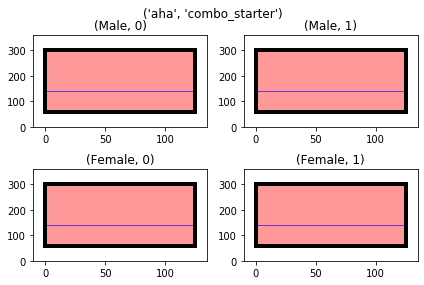

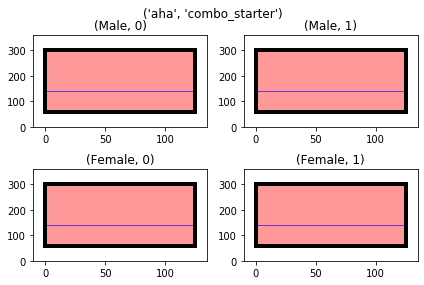

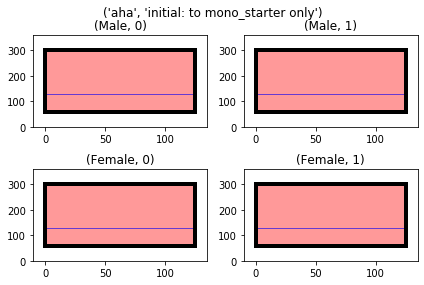

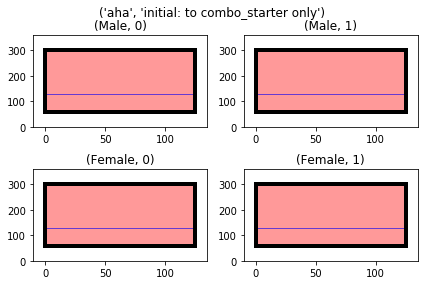

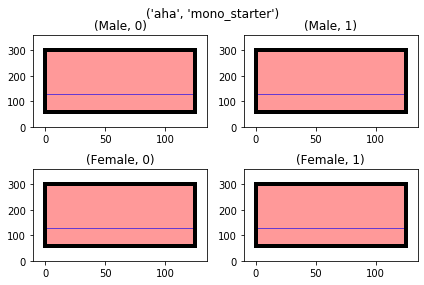

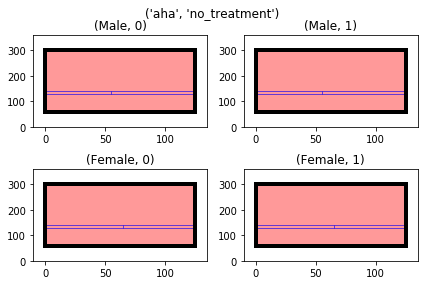

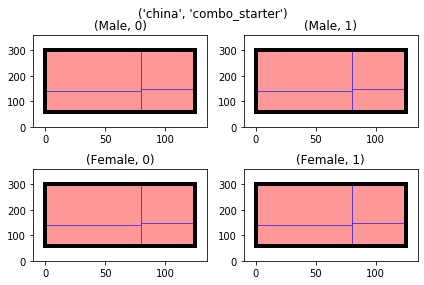

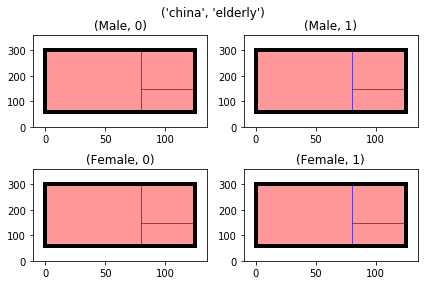

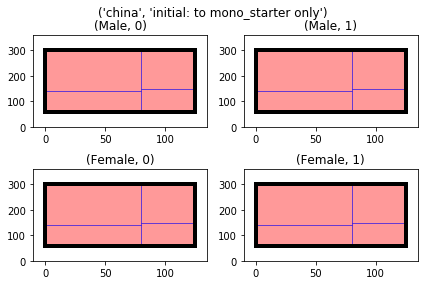

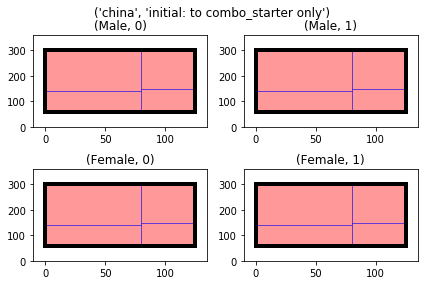

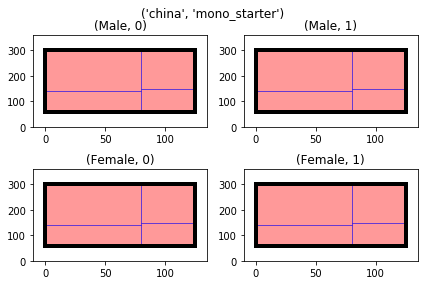

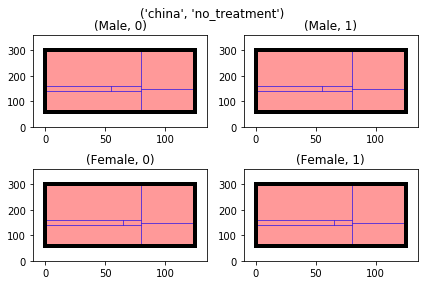

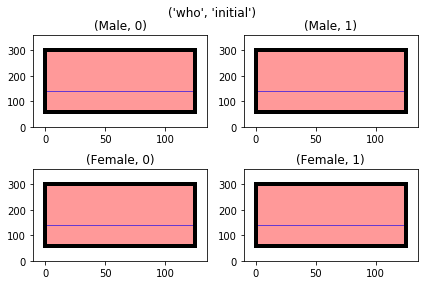

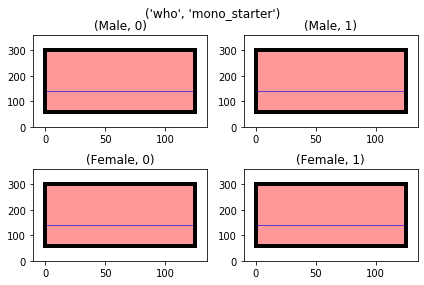

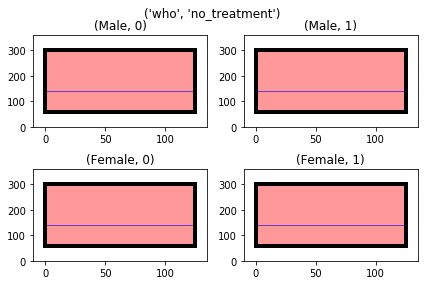

In [127]:
ramp_transitions.groupby(['guideline', 'from_ramp']).apply(plot_ramp)
plt.show()